<a href="https://colab.research.google.com/github/HP-002/wine_judge/blob/main/red_wine_judge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

# Globals
stats = []

# Read Sample Data

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib


In [35]:
df = pd.read_csv("winequality-red.csv", sep=";")
df['quality'] = pd.to_numeric(df['quality'], errors='coerce')

In [36]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [37]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

# Refactor the data

Since the quality labels 3-9 are a wide range of categories, we will split these into 3 catagories. We will split the data into the following 3 categories:

- Low (0): 3 to 5
- Mid (1): 6 to 7
- High (2): 8 to 9

In [38]:
category_bins = [0, 5.5, 7.5, 10]
category_labels = [0, 1, 2]
df['quality'] = pd.cut(df['quality'], bins=category_bins, labels=category_labels)
df['quality'] = df['quality'].astype('int64')

In [39]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


Split the data into Training and Testing Data

In [40]:
var_cols = np.array(df.columns[:-1])
print(var_cols)

['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']


In [41]:
x = df[var_cols]
y = df['quality']

sc = StandardScaler()
x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# ML Models

## K-Nearest Neighbors (KNN)


In [42]:
# Create KNN classifier with 3 neighbors
knn_3 = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn_3.fit(x_train, y_train)

# Predictions from test data
predictions_knn_3 = knn_3.predict(x_test)

# Classification report
knn_3_cr = classification_report(y_test, predictions_knn_3)
print(knn_3_cr)
knn_3_cross_val = cross_val_score(estimator=knn_3, X=x_train, y=y_train, cv=10)
print(knn_3_cross_val.mean())

# Save Stats
model_stats = {
    'Model Name': 'KNN_3',
    'Test Accuracy': accuracy_score(y_test, predictions_knn_3),
    'CV Mean Accuracy': knn_3_cross_val.mean(),
    'CV Accuracy STD': knn_3_cross_val.std()
}

stats.append(model_stats)

              precision    recall  f1-score   support

           0       0.66      0.64      0.65       141
           1       0.69      0.72      0.71       174
           2       0.00      0.00      0.00         5

    accuracy                           0.68       320
   macro avg       0.45      0.45      0.45       320
weighted avg       0.67      0.68      0.67       320

0.7138656496062993


In [43]:
# Create KNN classifier with 5 neighbors
knn_5 = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_5.fit(x_train, y_train)

# Predictions from test data
predictions_knn_5 = knn_5.predict(x_test)

# Classification report
knn_5_cr = classification_report(y_test, predictions_knn_5)
print(knn_5_cr)
knn_5_cross_val = cross_val_score(estimator=knn_5, X=x_train, y=y_train, cv=10)
print(knn_5_cross_val.mean())

# Save Stats
model_stats = {
    'Model Name': 'KNN_5',
    'Test Accuracy': accuracy_score(y_test, predictions_knn_5),
    'CV Mean Accuracy': knn_5_cross_val.mean(),
    'CV Accuracy STD': knn_5_cross_val.std()
}

stats.append(model_stats)

              precision    recall  f1-score   support

           0       0.68      0.62      0.65       141
           1       0.70      0.77      0.73       174
           2       0.00      0.00      0.00         5

    accuracy                           0.69       320
   macro avg       0.46      0.46      0.46       320
weighted avg       0.68      0.69      0.68       320

0.7099347933070865


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Decision Tree

In [44]:
# Create the model
dt = DecisionTreeClassifier()

# Train the model
dt.fit(x_train, y_train)

# Predictions from test data
predictions_dt = dt.predict(x_test)

# Classification Report
dt_cr = classification_report(y_test, predictions_dt)
print(dt_cr)
dt_cross_val = cross_val_score(estimator=dt, X=x_train, y=y_train, cv=10)
print(dt_cross_val.mean())

# Save Stats
model_stats = {
    'Model Name': 'Decision Tree',
    'Test Accuracy': accuracy_score(y_test, predictions_dt),
    'CV Mean Accuracy': dt_cross_val.mean(),
    'CV Accuracy STD': dt_cross_val.std()
}

stats.append(model_stats)

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       141
           1       0.73      0.74      0.73       174
           2       0.25      0.20      0.22         5

    accuracy                           0.71       320
   macro avg       0.56      0.54      0.55       320
weighted avg       0.71      0.71      0.71       320

0.7435593011811024


## Random Forest Classifier

In [45]:
# Create the model
rf = RandomForestClassifier()

# Train the model
rf.fit(x_train, y_train)

# Predictions from test data
predictions_rf = rf.predict(x_test)

# Classification Report
rf_cr = classification_report(y_test, predictions_rf)
print(rf_cr)
rf_cross_val = cross_val_score(estimator=rf, X=x_train, y=y_train, cv=10)
print(rf_cross_val.mean())

# Save Stats
model_stats = {
    'Model Name': 'Random Forest',
    'Test Accuracy': accuracy_score(y_test, predictions_rf),
    'CV Mean Accuracy': rf_cross_val.mean(),
    'CV Accuracy STD': rf_cross_val.std()
}

stats.append(model_stats)

              precision    recall  f1-score   support

           0       0.76      0.77      0.76       141
           1       0.79      0.80      0.79       174
           2       0.00      0.00      0.00         5

    accuracy                           0.77       320
   macro avg       0.52      0.52      0.52       320
weighted avg       0.76      0.77      0.77       320

0.8077017716535433


## Stochastic Gradient Descent

In [46]:
# Create the model
sgd = SGDClassifier()

# Train the model
sgd.fit(x_train, y_train)

# Predictions from test data
predictions_sgd = sgd.predict(x_test)

# Classification Report
sgd_cr = classification_report(y_test, predictions_sgd, zero_division=1)
print(sgd_cr)
sgd_cross_val = cross_val_score(estimator=sgd, X=x_train, y=y_train, cv=10)
print(sgd_cross_val.mean())

# Save Stats
model_stats = {
    'Model Name': 'Stochastic Gradient Descent',
    'Test Accuracy': accuracy_score(y_test, predictions_sgd),
    'CV Mean Accuracy': sgd_cross_val.mean(),
    'CV Accuracy STD': sgd_cross_val.std()
}

stats.append(model_stats)

              precision    recall  f1-score   support

           0       0.70      0.60      0.65       141
           1       0.70      0.79      0.74       174
           2       0.00      0.00      0.00         5

    accuracy                           0.70       320
   macro avg       0.47      0.47      0.46       320
weighted avg       0.69      0.70      0.69       320

0.6990157480314961


# Statistics

In [47]:
df_results = pd.DataFrame(stats)
df_results

,Model Name,Test Accuracy,CV Mean Accuracy,CV Accuracy STD
0,KNN_3,0.675000,0.713866,0.036655
1,KNN_5,0.690625,0.709935,0.027103
2,Decision Tree,0.709375,0.743559,0.045740
3,Random Forest,0.771875,0.807702,0.029496
4,Stochastic Gradient Descent,0.696875,0.699016,0.031221


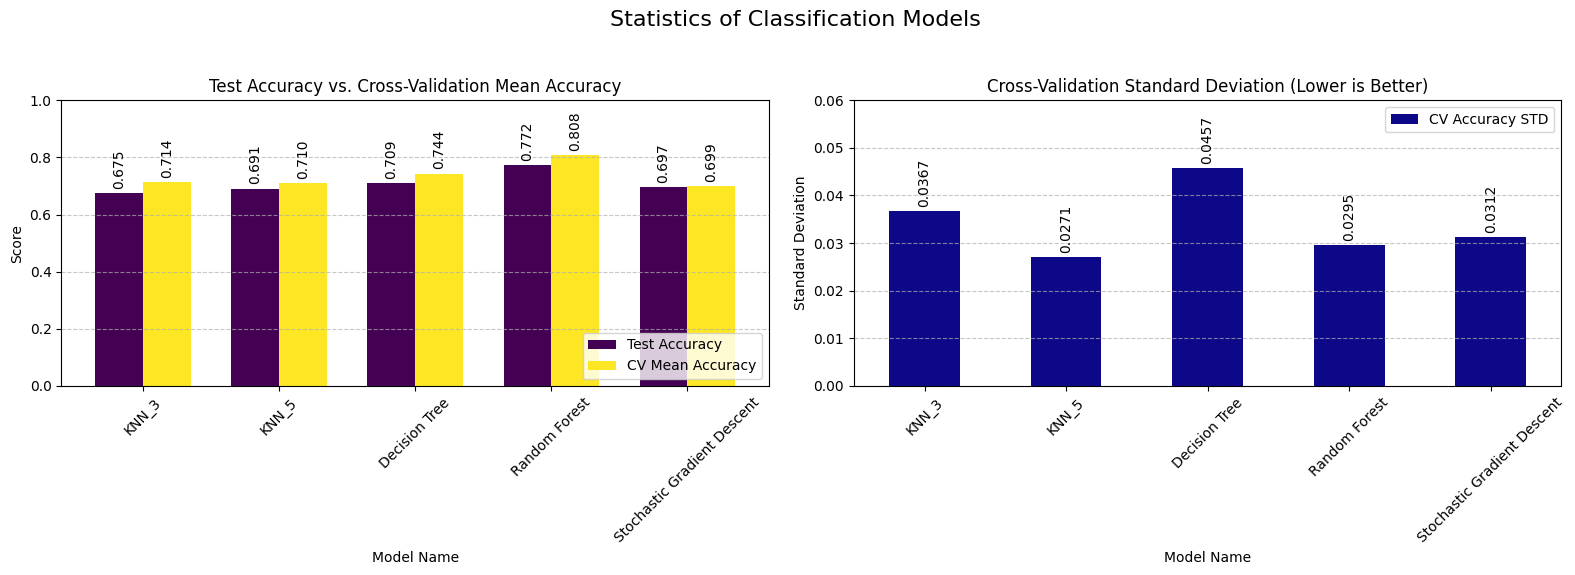

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6)) # 1 row, 2 columns for now
fig.suptitle('Statistics of Classification Models', fontsize=16)

# Plot 1: Test Accuracy vs. CV Mean Accuracy
ax1 = axes[0] # Use axes[0] as it's the first in a 1x2 grid
df_results.plot(x='Model Name', y=['Test Accuracy', 'CV Mean Accuracy'], kind='bar', ax=ax1,
                rot=45, colormap='viridis', width=0.7)
ax1.set_title('Test Accuracy vs. Cross-Validation Mean Accuracy')
ax1.set_ylabel('Score')
ax1.set_ylim(0, 1) # Scores are between 0 and 1
ax1.legend(loc='lower right')
for container in ax1.containers: # Add value labels on bars
    ax1.bar_label(container, fmt='%.3f', padding=3, rotation=90)
ax1.grid(axis='y', linestyle='--', alpha=0.7) # Add grid for better readability


# Plot 2: Cross-Validation Standard Deviation
ax2 = axes[1] # Use axes[1] as it's the second in a 1x2 grid
df_results.plot(x='Model Name', y='CV Accuracy STD', kind='bar', ax=ax2,
                rot=45, colormap='plasma', width=0.5)
ax2.set_title('Cross-Validation Standard Deviation (Lower is Better)')
ax2.set_ylabel('Standard Deviation')
ax2.set_ylim(0, 0.06) # Adjust y-limit based on your STD range, or leave commented for auto-scaling
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.4f', padding=3, rotation=90) # Use .4f for STD
ax2.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()